In [1]:
%pylab inline
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


#Ecuaciones
###crecimiento A
> Fenotipo A

$\dot{A} = \gamma (B-A) + A/g_A $

###crecimiento B
> Fenotipo B

$\dot{B} = -\gamma (B-A) + B/g_B $

##Medios
A $\longrightarrow$ $g_{A1} g_{B1}$

B $\longrightarrow$ $g_{A2} g_{B2}$
        


    


#Competencia Determinista
> AB contra CD en un medio oscilante

In [26]:
def growth2(A, B, media, gA, gB, gam):  
    '''Devuelve la velocidad con que crecen A y B
    A,B: cantidad de células de un tipo
    media: medio en el que se esta
    gA1, gB1: taza de crecimiento de células A y B en medio A
    gA2, gB2: taza de crecimiento de células A y B en medio B
    gam: taza de transiciones'''
    if media == 1:             #estamos en A
        vA = gam*(B-A) + A/gA[0]
        vB = -gam*(B-A) + B/gB[0]
    if media == -1:            #estamos en b
        vA = gam*(B-A) + A/gA[1]
        vB = -gam*(B-A) + B/gB[1]
        
    return vA,vB

In [27]:
def RK2(listA, listB, listvA, listvB, media, gA, gB, dt, tmax, gam):
    '''RungeKutta
    listA, listB: lista de cantidad de celulas
    listvA, listvB: lista de crecimiento 
    media: lista de medio en el que se esta
    gA, gB: taza de crecimiento gA>gB
    dt: paso
    tmax: tiempo de simulacion'''
    n=0
    while n < (tmax/dt-1):
        At = listA[n]
        Bt = listB[n]
        vAt = listvA[n]
        vBt = listvB[n]
        m = media[n]
        
        K1 = vAt*dt
        L1 = vBt*dt
        
        At = listA[n] + 0.5*K1
        Bt = listB[n] + 0.5*L1
        vAt, vBt = growth2(At, Bt, m, gA, gB, gam)
        
        K2 = vAt*dt
        L2 = vBt*dt
        
        At = listA[n] + 0.5*K2
        Bt = listB[n] + 0.5*L2
        vAt, vBt = growth2(At, Bt, m, gA, gB, gam)
        
        K3 = vAt*dt
        L3 = vBt*dt
        
        At = listA[n] + 0.5*K3
        Bt = listB[n] + 0.5*L3
        vAt, vBt = growth2(At, Bt, m, gA, gB, gam)
        
        K4 = vAt*dt
        L4 = vBt*dt
        
        K = (K4 + 2*K3 + 2*K2 + K1)/6.0
        L = (L4 + 2*L3 + 2*L2 + L1)/6.0
        
        listA[n+1] = listA[n] + K
        listB[n+1] = listB[n] + L
        listvA[n+1], listvB[n+1]= growth2(listA[n+1], listB[n+1], m, gA, gB, gam)
        
        n = n+1

## Fast vs Slow generalistas 6h

In [28]:
tmax = 7*24*60.0                  #tiempo de simulacion
dt=1/(60.0*2)                     #paso (0.5 segundos)

A = zeros(tmax/dt)         
vA = zeros(tmax/dt) 
B = zeros(tmax/dt)
vB = zeros(tmax/dt)

C = zeros(tmax/dt)         
vC = zeros(tmax/dt) 
D = zeros(tmax/dt)
vD = zeros(tmax/dt)

T = arange(0,tmax,dt)      
Media = signal.square(pi/(6*60.0) *T)  #Oscilaciones medio

In [29]:
A[0] = 10
B[0] = 0
gA = [130.0, 140.0]
gB = [140.0, 130.0]
gammA = 1/(6*60.0)                 #Fast
vA[0], vB[0] = growth2(A[0], B[0], Media[0], gA, gB, gammA)

C[0] = 10
D[0] = 0
gC = [130.0, 140.0]
gD = [140.0, 130.0]
gammB = 1/(24*60.0)                #Slow
vC[0], vD[0] = growth2(C[0], D[0], Media[0], gC, gD, gammB)

In [30]:
RK2(A, B, vA, vB, Media, gA, gB, dt, tmax, gammA)
RK2(C, D, vC, vD, Media, gC, gD, dt, tmax, gammB)

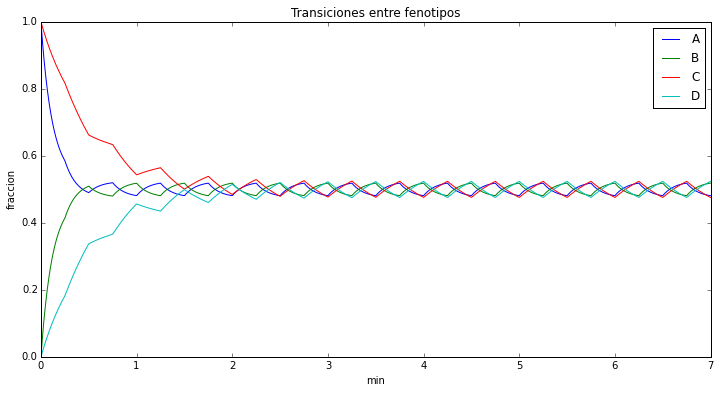

In [35]:
plot(T/60.0/24.0,(A)/(A+B), label="A")
plot(T/60.0/24.0,(B)/(A+B), label="B")
plot(T/60.0/24.0,(C)/(C+D), label="C")
plot(T/60.0/24.0,(D)/(C+D), label="D")
xlabel("min")
ylabel("fraccion")
title("Transiciones entre fenotipos")
legend()

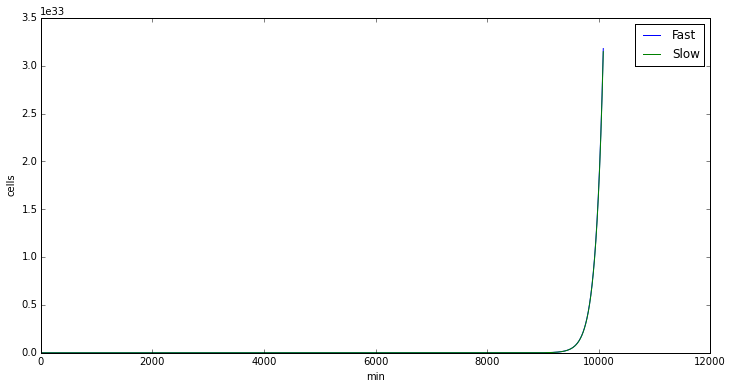

In [22]:
plot(T,A+B, label="Fast")
plot(T,C+D, label="Slow")
xlabel("min")
ylabel("cells")
legend()

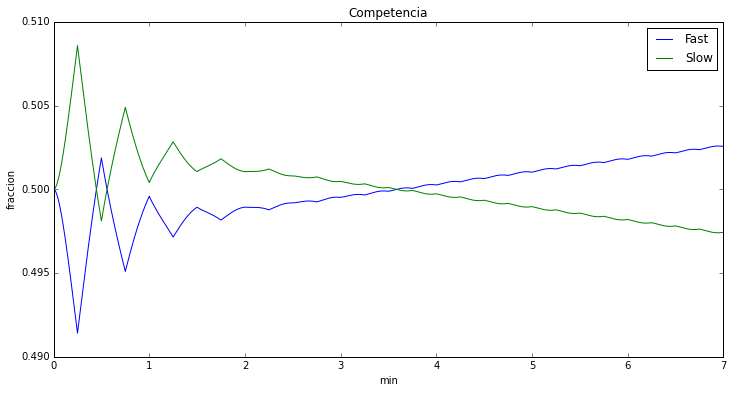

In [36]:
plot(T/60.0/24.0,(A+B)/(A+B+C+D), label="Fast")
plot(T/60.0/24.0,(C+D)/(A+B+C+D), label="Slow")
xlabel("min")
ylabel("fraccion")
title("Competencia")
legend()

## Fast vs slow generalistas 24h

In [37]:
tmax = 7*24*60.0                  #tiempo de simulacion
dt=1/(60.0*2)                     #paso (0.5 segundos)

A = zeros(tmax/dt)         
vA = zeros(tmax/dt) 
B = zeros(tmax/dt)
vB = zeros(tmax/dt)

C = zeros(tmax/dt)         
vC = zeros(tmax/dt) 
D = zeros(tmax/dt)
vD = zeros(tmax/dt)

T = arange(0,tmax,dt)      
Media = signal.square(pi/(24*60.0) *T)  #Oscilaciones medio

A[0] = 10
B[0] = 0
gA = [130.0, 140.0]
gB = [140.0, 130.0]
gammA = 1/(6*60.0)                 #Fast
vA[0], vB[0] = growth2(A[0], B[0], Media[0], gA, gB, gammA)

C[0] = 10
D[0] = 0
gC = [130.0, 140.0]
gD = [140.0, 130.0]
gammB = 1/(24*60.0)                #Slow
vC[0], vD[0] = growth2(C[0], D[0], Media[0], gC, gD, gammB)

RK2(A, B, vA, vB, Media, gA, gB, dt, tmax, gammA)
RK2(C, D, vC, vD, Media, gC, gD, dt, tmax, gammB)

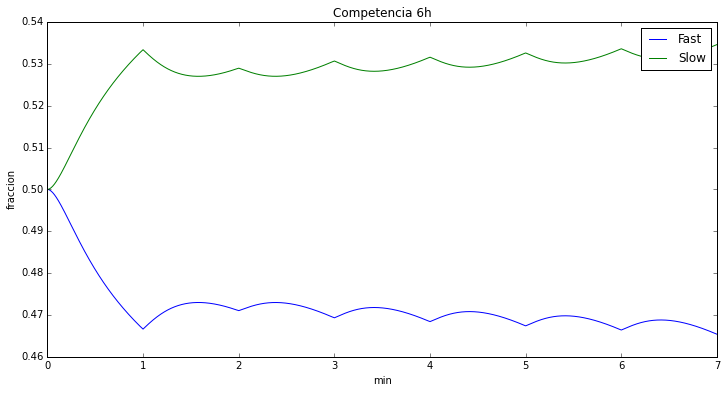

In [38]:
plot(T/60.0/24.0,(A+B)/(A+B+C+D), label="Fast")
plot(T/60.0/24.0,(C+D)/(A+B+C+D), label="Slow")
xlabel("min")
ylabel("fraccion")
title("Competencia 6h")
legend()

# Transiciones
> A se vuelve B a una taza $\gamma$, en medio oscilante

In [23]:
def growth3(A, B, N, gA, gB, gam):
        '''Simulación con algoritmo de gillespie'''
        K = 2*gam*A + 2*gam*B + A/gA + B/gB 
        u = random.random(2)
        talgo = 1/K * log(1/u[0])
        if u[1] < (2*gam*A)/K:                            #A pasa a B
            A = A-1.0
            B = B+1.0
        elif u[1] < (2*gam*A + 2*gam*B)/K:                #B pasa a A
            A = A+1.0
            B = B-1.0
        elif u[1] < (2*gam*A + 2*gam*B + A/gA)/K:         #A crece
            A = A+1.0
            N = N+1.0
        else:                                             #B crece
            B = B+1.0
            N = N+1.0
        return A, B, N, talgo

In [33]:
N = array([10])   #Numero total de células
A = array([10])   #Numero de células A
B = N-A           #Numero de células B

gA = 90.0
gB = 210.0
gam = 1/(12*60.0)

tmax = 15*60.0                  #tiempo de simulacion
T = array([0])


In [34]:
t=0.0
i=0
while (t<tmax):
    An, Bn, Nn, dt = growth3(A[i], B[i], N[i], gA, gB, gam)
    A = append(A,An)
    B = append(B,Bn)
    N = append(N,Nn)
    
    T = append(T,t+dt)
    i = i+1
    t = t+dt
  
    

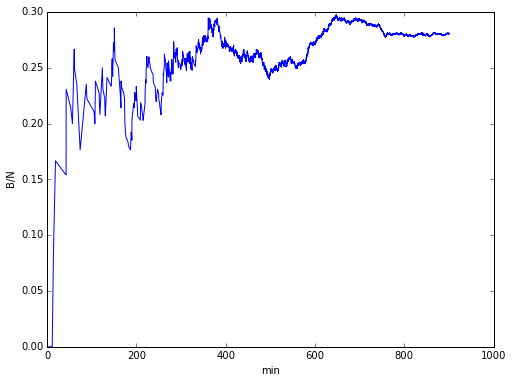

In [35]:
plot(T,B/N)
xlabel("min")
ylabel("B/N")

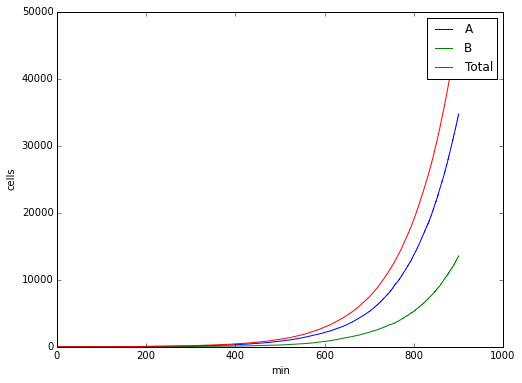

In [36]:
plot(T,A, label="A")
plot(T,B, label="B")
plot(T,N, label="Total")
xlabel("min")
ylabel("cells")
legend()

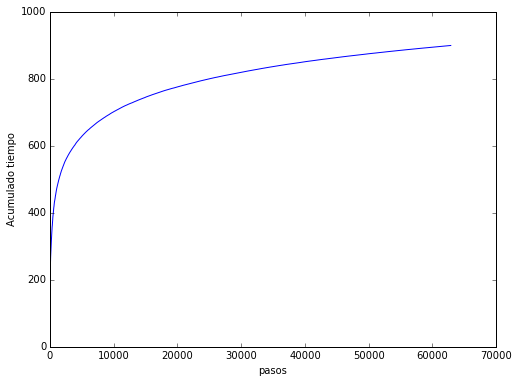

In [38]:
plot(T)
xlabel("pasos")
ylabel("Acumulado tiempo")